##  Project objects
- Clean dirty log data and transform it for analytics.
- Exploratory data analysis, e.g. find user activity levels for different events, and user interaction with web components.
- Find the conversion rate of users, identify key factors that bottleneck the conversion rate.
- Propose any hypothesis and set up experiments for testing.
- Build machine learning models to predict user behaviors, including but not limited to signup, churn, etc.
- Discover interesting insights in the dataset and suggest how to improve the user signup rate.

## Load data and browse data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [2]:
# Load data from file
df = pd.read_csv('data/selected_data.csv')

In [3]:
# Browse dataset
df.head(10)

,browser,browser_v,day,is_fd,is_ft,ip,latest_utm_s,model,os,os_version,...,signup,browser_bin,model_bin,os_bin,CT,PRO,CT_bin,PRO_bin,hour,worktime
0,chrome,45.0,2017-03-10,True,False,111.207.114.194,baidu,pc,windows,6.10,...,1,chrome_others,pc,windows,Beijing,BJ,Beijing,BJ,1,1
1,sogou,2.0,2017-03-13,False,False,1.202.80.36,sensordata,pc,windows,6.10,...,1,sogou,pc,windows,Beijing,BJ,Beijing,BJ,6,1
2,chrome,56.0,2017-03-13,True,False,210.12.8.240,baidu,pc,windows,6.10,...,0,chrome,pc,windows,Beijing,BJ,Beijing,BJ,4,1
3,qq,9.5,2017-03-06,True,False,61.183.68.74,sensordata,pc,windows,6.10,...,0,qq,pc,windows,Wuhan,HB,Wuhan,HB,20,0
4,chrome,56.0,2017-03-11,True,False,101.80.177.64,baidu,mac,macosx,10.11,...,0,chrome,mac,macosx_others,Shanghai,SH,Shanghai,SH,8,1
5,chrome,56.0,2017-03-09,True,False,114.249.167.81,baidu,mac,macosx,10.12,...,0,chrome,mac,macosx,Beijing,BJ,Beijing,BJ,7,1
6,sogou,2.0,2017-03-07,True,False,119.123.126.233,baidu,pc,windows,6.10,...,1,sogou,pc,windows,Shenzhen,GD,Shenzhen,GD,4,1
7,chrome,56.0,2017-03-11,False,False,182.48.107.156,baidu,mac,macosx,10.12,...,0,chrome,mac,macosx,Beijing,BJ,Beijing,BJ,0,1
8,safari,10.0,2017-03-08,True,False,182.18.2.100,sensordata,mac,macosx,10.12,...,0,safari,mac,macosx,Beijing,BJ,Beijing,BJ,1,1
9,chrome,56.0,2017-03-08,False,False,116.226.99.241,admin,mac,macosx,10.12,...,0,chrome,mac,macosx,Shanghai,SH,Shanghai,SH,4,1


In [4]:
# Show summary stats
df.describe()

,browser_v,os_version,pageS,time,CN,weekend,signup,hour,worktime
count,1436.000000,1436.000000,1.436000e+03,1.436000e+03,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,41.624191,8.167180,1.984706e+04,1.489163e+12,1.130223,0.086351,0.284819,7.672702,0.740947
std,19.656667,2.127232,1.066756e+05,2.279683e+08,0.370185,0.280979,0.451485,7.657938,0.438267
min,-1.000000,-1.000000,1.420000e-01,1.488791e+12,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,6.100000,2.351475e+01,1.488964e+12,1.000000,0.000000,0.000000,2.000000,0.000000
50%,51.000000,10.000000,2.590280e+02,1.489126e+12,1.000000,0.000000,0.000000,4.000000,1.000000
75%,56.000000,10.110000,4.340998e+03,1.489396e+12,1.000000,0.000000,1.000000,10.000000,1.000000
max,58.000000,10.900000,2.918014e+06,1.489513e+12,2.000000,1.000000,1.000000,23.000000,1.000000


## Build Logistic Regression Model

#### Encode categorical columns to numeric values

In [5]:
df.columns

Index(['browser', 'browser_v', 'day', 'is_fd', 'is_ft', 'ip', 'latest_utm_s',
       'model', 'os', 'os_version', 'pageS', 'time', 'CN', 'source', 'weekend',
       'signup', 'browser_bin', 'model_bin', 'os_bin', 'CT', 'PRO', 'CT_bin',
       'PRO_bin', 'hour', 'worktime'],
      dtype='object')

In [6]:
col_category = ['browser_bin', 'model_bin','os_bin','CT_bin','PRO_bin','source']

In [7]:
df_dummies = pd.get_dummies(df[col_category], columns=col_category)

In [8]:
df_dummies

,browser_bin_chrome,browser_bin_chrome_others,browser_bin_firefox,browser_bin_others,browser_bin_qq,browser_bin_safari,browser_bin_sogou,model_bin_mac,model_bin_others,model_bin_pc,...,PRO_bin_HB,PRO_bin_JS,PRO_bin_SC,PRO_bin_SH,PRO_bin_ZJ,PRO_bin_others,source_baidu,source_others,source_sensordata,source_sogou
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [9]:
df = df.join(df_dummies)

In [10]:
df.head()

,browser,browser_v,day,is_fd,is_ft,ip,latest_utm_s,model,os,os_version,...,PRO_bin_HB,PRO_bin_JS,PRO_bin_SC,PRO_bin_SH,PRO_bin_ZJ,PRO_bin_others,source_baidu,source_others,source_sensordata,source_sogou
0,chrome,45.0,2017-03-10,True,False,111.207.114.194,baidu,pc,windows,6.10,...,0,0,0,0,0,0,1,0,0,0
1,sogou,2.0,2017-03-13,False,False,1.202.80.36,sensordata,pc,windows,6.10,...,0,0,0,0,0,0,0,0,1,0
2,chrome,56.0,2017-03-13,True,False,210.12.8.240,baidu,pc,windows,6.10,...,0,0,0,0,0,0,1,0,0,0
3,qq,9.5,2017-03-06,True,False,61.183.68.74,sensordata,pc,windows,6.10,...,1,0,0,0,0,0,0,0,1,0
4,chrome,56.0,2017-03-11,True,False,101.80.177.64,baidu,mac,macosx,10.11,...,0,0,0,1,0,0,1,0,0,0


In [11]:
df.columns

Index(['browser', 'browser_v', 'day', 'is_fd', 'is_ft', 'ip', 'latest_utm_s',
       'model', 'os', 'os_version', 'pageS', 'time', 'CN', 'source', 'weekend',
       'signup', 'browser_bin', 'model_bin', 'os_bin', 'CT', 'PRO', 'CT_bin',
       'PRO_bin', 'hour', 'worktime', 'browser_bin_chrome',
       'browser_bin_chrome_others', 'browser_bin_firefox',
       'browser_bin_others', 'browser_bin_qq', 'browser_bin_safari',
       'browser_bin_sogou', 'model_bin_mac', 'model_bin_others',
       'model_bin_pc', 'os_bin_macosx', 'os_bin_macosx_others',
       'os_bin_others', 'os_bin_windows', 'os_bin_windows_others',
       'CT_bin_Beijing', 'CT_bin_Chengdu', 'CT_bin_Guangzhou',
       'CT_bin_Hangzhou', 'CT_bin_Nanjing', 'CT_bin_Shanghai',
       'CT_bin_Shenzhen', 'CT_bin_Wuhan', 'CT_bin_others', 'PRO_bin_BJ',
       'PRO_bin_GD', 'PRO_bin_HB', 'PRO_bin_JS', 'PRO_bin_SC', 'PRO_bin_SH',
       'PRO_bin_ZJ', 'PRO_bin_others', 'source_baidu', 'source_others',
       'source_sensordata', 'sou

### Define Features and Target

In [12]:
selected_features = [u'browser_bin_chrome',
                     u'browser_bin_chrome_others', u'browser_bin_firefox',
                     u'browser_bin_others', u'browser_bin_qq', u'browser_bin_safari',
                     u'browser_bin_sogou', u'model_bin_mac', u'model_bin_others',
                     u'model_bin_pc', u'os_bin_macosx', u'os_bin_macosx_others',
                     u'os_bin_others', u'os_bin_windows', u'os_bin_windows_others',
                     u'CT_bin_Beijing', u'CT_bin_Chengdu', u'CT_bin_Guangzhou',
                     u'CT_bin_Hangzhou', u'CT_bin_Nanjing', u'CT_bin_Shanghai',
                     u'CT_bin_Shenzhen', u'CT_bin_Wuhan', u'CT_bin_others', u'PRO_bin_BJ',
                     u'PRO_bin_GD', u'PRO_bin_HB', u'PRO_bin_JS', u'PRO_bin_SC', u'PRO_bin_SH',
                     u'PRO_bin_ZJ', u'PRO_bin_others', u'source_baidu', u'source_others',
                     u'source_sensordata', u'source_sogou',
                     u'is_fd', u'pageS', u'CN',u'weekend', u'worktime']
target = u'signup'

In [13]:
X = df[selected_features].values
y = df['signup'].values

In [14]:
X.shape

(1436, 41)

#### Let's Train-test split the data!

In [52]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)

### Logistic Regression model using sklearn

In [53]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l2')

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

### Calculate the metric scores for the model

In [54]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [55]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

/Users/Danielle/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Danielle/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


              train      test
metrics                      
AUC        0.594859  0.639436
Accuracy   0.709302  0.717694
Precision  0.000000  0.000000
Recall     0.000000  0.000000
f1-score   0.000000  0.000000


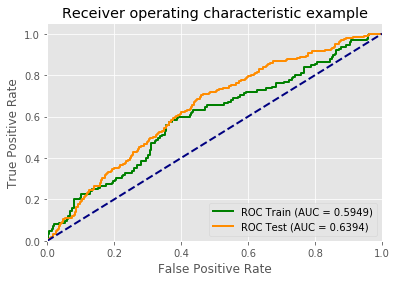

In [57]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

Understanding the Estimated Coefficients

In [58]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
32,source_baidu,0.030396
6,browser_bin_sogou,0.023107
35,source_sogou,0.011571
28,PRO_bin_SC,0.010440
16,CT_bin_Chengdu,0.010440
21,CT_bin_Shenzhen,0.010095
23,CT_bin_others,0.000936
37,pageS,-0.000004
1,browser_bin_chrome_others,-0.005381
31,PRO_bin_others,-0.007256


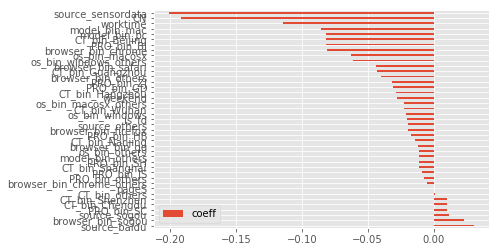

In [59]:
ax = df_coeffs.plot.barh(width=0.35)
t = np.arange(X.shape[1])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()